<a href="https://colab.research.google.com/github/Jinwooseol/Python-machine-learning/blob/main/Job_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [머신러닝] 채용 공고 추천
- https://programmers.co.kr/assignments/18013/challenges/849

# STEP 1. 데이터 구조 설명 및 채점 기준 안내
# 문제 개요
이 문제는 실제 Programmers 채용 공고 페이지를 방문한 개발자들의 방문/지원 기록을 바탕으로 추천모델을 만들어보는 것이다. 참고로 모든 데이터는 익명화되었음을 밝힌다. 구체적으로 개발자(userID로 표현됨)와 채용공고(jobID로 표현됨)를 보고 개발자가 해당 채용공고에 지원할지 안 할지를 예측하는 Binary Classifier를 만드는 것이다. 이 모델을 만드는데 필요한 feature들은 부가적으로 제공되는 데이터 파일들을 바탕으로 만들어내면 되며 이에 대해서는 뒤의 데이터 세트 섹션에서 설명한다.

# 데이터 세트 설명
- 이 문제를 해결하는데 필요한 데이터들은 다음과 같은 6개의 파일에 들어있으며 각 파일에 관해 설명한다.


# 최종 제출 파일
- 최종 제출 파일은 applied 필드를 가지는 csv파일이며 test.csv에서 나오는 user가 지원했을지 여부를 값으로 가져야 한다. (1이면 지원을 나타내고 0이면 지원하지 않음을 나타냄)
- 최종 제출 파일의 n번째 줄값은 test.csv의 n번째 줄 사용자에 대한 예측값이어야 한다.

# 데이터 관련 안내
- 작성한 코드의 저작권은 응시자에게 있음  
- 데이터의 저작권은 그렙에 있으므로 제3자에게 공유하거나 개인적인 용도로 사용할 수 없으며, 외부 블로그 등에 공개 불가
- 그렙에서 사용하기 위해 데이터를 제공하는 것이 아니며, 실전 데이터를 제공해서 평가 진행하기 위해 제공함
- 모델 학습을 위해 외부 데이터 및 모델(pre-trained model)을 사용 불가

# 채점 방식
- Accuracy 100%


# Modules

In [ ]:
import numpy as np
import pandas as pd


# Data 다운로드

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/인공지능 학습/Project/Job Recommendation/train.csv')
job_companies = pd.read_csv('/content/drive/MyDrive/인공지능 학습/Project/Job Recommendation/job_companies.csv')
job_tags = pd.read_csv('/content/drive/MyDrive/인공지능 학습/Project/Job Recommendation/job_tags.csv')
tags = pd.read_csv('/content/drive/MyDrive/인공지능 학습/Project/Job Recommendation/tags.csv')
user_tags = pd.read_csv('/content/drive/MyDrive/인공지능 학습/Project/Job Recommendation/user_tags.csv')
test_job = pd.read_csv('/content/drive/MyDrive/인공지능 학습/Project/Job Recommendation/test_job.csv')

# train.csv

- 첫 번째 칼럼은 개발자의 ID이고 두 번째 칼럼은 구인공고(이후 “잡”이라 표현)의 ID가 된다. 
- 마지막 세 번째 칼럼은 개발자가 해당 구인공고를 보고 지원을 했는지 여부를 나타낸다. 
- 앞서 이야기했듯이 이번에 만들어볼 추천모델은 개발자와 잡의 페어를 보고 지원 여부를 예측하는 것이다. 
- 이를 위해서는 개발자와 잡에 대한 세부 정보가 필요한데 뒤에 나오는 4개의 파일에서 그런 정보들(Features)을 추출할 수 있다.


In [ ]:
print(train_data.head(5))
print(train_data.shape)

                             userID                             jobID  applied
0  fe292163d06253b716e9a0099b42031d  15de21c670ae7c3f6f3f1f37029303c9        0
1  6377fa90618fae77571e8dc90d98d409  55b37c5c270e5d84c793e486d798c01d        0
2  8ec0888a5b04139be0dfe942c7eb4199  0fcbc61acd0479dc77e3cccc0f5ffca7        1
3  f862b39f767d3a1991bdeb2ea1401c9c  3b5dca501ee1e6d8cd7b905f4e1bf723        0
4  cac14930c65d72c16efac2c51a6b7f71  287e03db1d99e0ec2edb90d079e142f3        0
(6000, 3)


# job_tags.csv

- 이 파일은 각 잡의 키워드(tagID)들을 나타낸다.
- 하나의 잡에는 여러 개의 키워드가 존재할 수 있다.
- tagID에 해당하는 키워드가 뭔지 알고 싶다면 뒤에서 설명하는 tags.csv를 참조하면 된다.

In [ ]:
print(job_tags.head(5))
print(job_tags.shape)

                              jobID                             tagID
0  320722549d1751cf3f247855f937b982  d38901788c533e8286cb6400b40b386d
1  e744f91c29ec99f0e662c9177946c627  3948ead63a9f2944218de038d8934305
2  e744f91c29ec99f0e662c9177946c627  0e095e054ee94774d6a496099eb1cf6a
3  e820a45f1dfc7b95282d10b6087e11c0  7d771e0e8f3633ab54856925ecdefc5d
4  e820a45f1dfc7b95282d10b6087e11c0  6c8dba7d0df1c4a79dd07646be9a26c8
(3477, 2)


# user_tags.csv
- 이 파일은 각 개발자가 관심사로 등록한 키워드(tagID)들을 나타낸다. 
- 한 개발자가 여러 개의 키워드를 등록할 수 있다. 
- 앞서 job_tags.csv처럼tagID에 해당하는 키워드가 뭔지 알고 싶다면 뒤에서 설명하는 tags.csv를 참조하면 된다.
- 예를 들어 tagID가 1189인 키워드는 JUnit이다.

In [ ]:
print(user_tags.head(5))
print(user_tags.shape)

                             userID                             tagID
0  e576423831e043f7928d9ac113abbe6f  82c2559140b95ccda9c6ca4a8b981f1e
1  e576423831e043f7928d9ac113abbe6f  2ba8698b79439589fdd2b0f7218d8b07
2  e576423831e043f7928d9ac113abbe6f  351b33587c5fdd93bd42ef7ac9995a28
3  e576423831e043f7928d9ac113abbe6f  81e5f81db77c596492e6f1a5a792ed53
4  e576423831e043f7928d9ac113abbe6f  0e095e054ee94774d6a496099eb1cf6a
(17194, 2)


# tags.csv

- 앞에서 이 파일은 이미 두 번 설명한 셈인데 tagID에 해당하는 실제 키워드가 무엇인지 기술한다.


In [ ]:
print(tags.head(5))
print(tags.shape)

                              tagID                   keyword
0  602d1305678a8d5fdb372271e980da6a  Amazon Web Services(AWS)
1  e3251075554389fe91d17a794861d47b                Tensorflow
2  a1d50185e7426cbb0acad1e6ca74b9aa                    Docker
3  884d79963bd8bc0ae9b13a1aa71add73                       Git
4  4122cb13c7a474c1976c9706ae36521d                    Python
(887, 2)


# job_companies.csv
- 파일은 잡과 관련된 회사가 어디인지 그 정보를 보여주는데 별다른 정보는 없고 회사의 규모를 보여주는 필드가 존재하는데 이 필드는 옵션 필드이다.  
  (값이 존재하지 않을 수 있음)
- 이 정보를 통해 어떤 잡들이 어느 회사에서 나온 것이고 그 회사의 크기는 어떻게 되는지 알 수 있다.

In [ ]:
print(job_companies.head(5))
print(job_companies.shape)

                          companyID                             jobID  \
0  00411460f7c92d2124a67ea0f4cb5f85  e5f6ad6ce374177eef023bf5d0c018b6   
1  1905aedab9bf2477edc068a355bba31a  185e65bc40581880c4f2c82958de8cfe   
2  89fcd07f20b6785b92134bd6c1d0fa42  0537fb40a68c18da59a35c2bfe1ca554   
3  acf4b89d3d503d8252c9c4ba75ddbf6d  b7ee6f5f9aa5cd17ca1aea43ce848496   
4  fb7b9ffa5462084c5f4e7e85a093e6d7  efe937780e95574250dabe07151bdc23   

  companySize  
0         NaN  
1       11-50  
2     101-200  
3        1-10  
4         NaN  
(733, 3)


# test.csv
- 라인마다 userID와 jobID가 있고 이 개발자가 이 잡에 지원을 할지 말지 예측을 하면 된다.

In [ ]:
print(test_job.head(5))
print(test_job.shape)

                             userID                             jobID
0  ebaee1af0c501f22ddfe242fc16dae53  352407221afb776e3143e8a1a0577885
1  9ab05403ac7808cbfba3da26665f7a9c  96b9bff013acedfb1d140579e2fbeb63
2  33349e909eba71677299d2fc97e158b7  58d4d1e7b1e97b258c9ed0b37e02d087
3  ac985a9db5faeb44c94a334430ccc241  ccb0989662211f61edae2e26d58ea92f
4  d41e0e6f6f1e29098d9d152511503ab2  4a213d37242bdcad8e7300e202e7caa4
(2435, 2)


# 모델 구축 아이디어
1. user_tags를 features로 사용하여 one-hot encoding을 수행한다.
2. tags에 따른 companies의 상관관계 확인
3. companies를 tags로 변환한 뒤, 각 user_id 마다 tags를 X로 사용하고 applied를 y로 사용하여 model을 학습
  - Model은 Random Forest, Logistic Regression, Gradient Boosting 등 사용 예정
4. 학습 된 model을 통해 test X로 예측 확인

# tag data의 index를 ID로 바꾼다.

In [ ]:
tags.set_index('tagID', inplace = True)
print(tags)

                                                   keyword
tagID                                                     
602d1305678a8d5fdb372271e980da6a  Amazon Web Services(AWS)
e3251075554389fe91d17a794861d47b                Tensorflow
a1d50185e7426cbb0acad1e6ca74b9aa                    Docker
884d79963bd8bc0ae9b13a1aa71add73                       Git
4122cb13c7a474c1976c9706ae36521d                    Python
...                                                    ...
818f4654ed39a1c147d1e51a00ffb4cb                        활용
7cce53cf90577442771720a370c3c723                    mybais
c2aee86157b4a40b78132f1e71a9e6f1                         *
1fb2a1c37b18aa4611c3949d6148d0f8             Autodesk Maya
5fa9e41bfec0725742cc9d15ef594120                Apache Pig

[887 rows x 1 columns]


# user_tags name을 추가

In [ ]:
# user_tags['tagName'] = user_tags['tagID']
# for i in user_tags.index:
#   user_tags.at[i, 'tagName'] = tags.loc[user_tags.at[i, 'tagName']]
# print(user_tags.at[0, 'tagName'])

# JobID를 tagID의 list로 변환
- JobID대신 tagID를 사용하여 특정 user가 특정 tagID의 set에 대하여 apply하는지 training data로 사용하기 위함


In [ ]:
# 각 job에 대한 tags를 하나의 list로 합치기
# 각 job마다 몇개의 tags를 가지는지 tag num 추가
jt = job_tags.groupby('jobID').agg({'tagID': lambda x: x.tolist()})
jt['tag num'] = jt['tagID'].apply(lambda x: len(x))
print(jt)

                                                                              tagID  \
jobID                                                                                 
00ac8ed3b4327bdd4ebbebcb2ba10a00  [884d79963bd8bc0ae9b13a1aa71add73, aace49c7d80...   
00e26af6ac3b1c1c49d7c3d79c60d000  [9a3d458322d70046f63dfd8b0153ece4, 4122cb13c7a...   
00ec53c4682d36f5c4359f4ae7bd7ba1  [1e1d184167ca7676cf665225e236a3d2, 45f31d16b10...   
013a006f03dbc5392effeb8f18fda755  [e702e51da2c0f5be4dd354bb3e295d37, 3fe78a8acf5...   
0188e8b8b014829e2fa0f430f0a95961  [f47330643ae134ca204bf6b2481fec47, 4122cb13c7a...   
...                                                                             ...   
fed33392d3a48aa149a87a38b875ba4a  [7d04bbbe5494ae9d2f5a76aa1c00fa2f, 7d771e0e8f3...   
ff4d5fbbafdf976cfdc032e3bde78de5  [c8ba76c279269b1c6bc8a07e38e78fa4, 2ba8698b794...   
ffd52f3c7e12435a724a8f30fddadd9c  [0e095e054ee94774d6a496099eb1cf6a, 81dc9bdb52d...   
ffeabd223de0d4eacb9a3e6e53e5448d  [602d1305

# User가 지원한 job의 tag와 user가 희망하는 tag 사이의 상관관계 (일치도) 확인
- 예시로 userID가 'fe292163d06253b716e9a0099b42031d'인 사용자에 대하여 각 jobID가 가지는 tags와 실제 본인이 원하는 tags사이의 상관관계 정도를 파악한다.

In [ ]:
# job의 tags와 user의 tags 일치도 확인
# job의 tag가 user의 tags에 포함되어 있으면 반환
def match(job_tags, user_tags):
  result = []
  for jtag in job_tags:
    if jtag in user_tags:
      result.append(jtag)
  return result

In [ ]:
# Sample user의 ID
sample_user = 'fe292163d06253b716e9a0099b42031d'

# Sample user가 원하는 tag의 IDs
sample_tags = user_tags[user_tags['userID'] == 'fe292163d06253b716e9a0099b42031d']['tagID'].values
print(sample_tags[:5])
print(sample_tags.shape)

# Sample user가 지원 또는 지원하지 않을 job의 ID 및 지원 정보
sample_jobs = train_data[train_data['userID'] == 'fe292163d06253b716e9a0099b42031d'][['jobID', 'applied']]
print(sample_jobs.head(5))
print(sample_jobs.shape)

# job의 tags와 user의 tags 일치도 확인
# job의 tag가 user의 tags에 포함되어 있으면 matched tags에 추가
sample_jobs['matched tags'] = sample_jobs['jobID'].apply(lambda x: match(jt.at[x, 'tagID'], sample_tags))
sample_jobs['matched tags num'] = sample_jobs['matched tags'].apply(lambda x: len(x))
sample_jobs['job tag num'] = sample_jobs['jobID'].apply(lambda x: jt.at[x, 'tag num'])
sample_jobs['tag ratio'] = sample_jobs['matched tags num'] / sample_jobs['job tag num'] * 100

# jobID에 해당하는 모든 tags
sample_jobs['job tags'] = sample_jobs['jobID'].apply(lambda x: jt.at[x, 'tagID'])
print(sample_jobs)
sample_jobs.to_excel("sample_jobs.xlsx")

['285ab9448d2751ee57ece7f762c39095' 'a1d50185e7426cbb0acad1e6ca74b9aa'
 'f47330643ae134ca204bf6b2481fec47' '5680522b8e2bb01943234bce7bf84534'
 '285f89b802bcb2651801455c86d78f2a']
(151,)
                                jobID  applied
0    15de21c670ae7c3f6f3f1f37029303c9        0
21   26337353b7962f533d78c762373b3318        0
378  ae5e3ce40e0404a45ecacaaf05e5f735        0
882  eddea82ad2755b24c4e168c5fc2ebd40        0
910  2b8a61594b1f4c4db0902a8a395ced93        0
(27, 2)
                                 jobID  applied  \
0     15de21c670ae7c3f6f3f1f37029303c9        0   
21    26337353b7962f533d78c762373b3318        0   
378   ae5e3ce40e0404a45ecacaaf05e5f735        0   
882   eddea82ad2755b24c4e168c5fc2ebd40        0   
910   2b8a61594b1f4c4db0902a8a395ced93        0   
989   5ea1649a31336092c05438df996a3e59        0   
1025  298f95e1bf9136124592c8d4825a06fc        0   
1628  1e48c4420b7073bc11916c6c1de226bb        1   
1688  6e2713a6efee97bacb63e52c54f0ada0        0   
1725  f73b76ce

# Sample Model
- tags를 기반으로 한 feature extraction으로 진행
- CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score

vec = CountVectorizer()
vec.fit(sample_tags)
print(vec.get_feature_names_out())

X = []

for i in sample_jobs.index:
  X.append(vec.transform(sample_jobs.at[i, 'matched tags']).toarray().sum(axis = 0))

X = pd.DataFrame(X, columns = vec.get_feature_names_out())
y = sample_jobs['applied']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

['285ab9448d2751ee57ece7f762c39095' '285f89b802bcb2651801455c86d78f2a'
 '3948ead63a9f2944218de038d8934305' '4122cb13c7a474c1976c9706ae36521d'
 '5680522b8e2bb01943234bce7bf84534' '7810ccd41bf26faaa2c4e1f20db70a71'
 '81dc9bdb52d04dc20036dbd8313ed055' '9adeb82fffb5444e81fa0ce8ad8afe7a'
 'a1d50185e7426cbb0acad1e6ca74b9aa' 'aace49c7d80767cffec0e513ae886df0'
 'b24d516bb65a5a58079f0f3526c87c57' 'f47330643ae134ca204bf6b2481fec47'
 'fe2d010308a6b3799a3d9c728ee74244']


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 3)
print('K-fold accuracy score: ',cross_val_score(rf, X, y).mean())

rf.fit(X_train, y_train)
print('Sample accuracy: ',rf.score(X_test, y_test))

K-fold accuracy score:  0.66
Sample accuracy:  0.7142857142857143


# 정확도 올리기
- Company - job관계 확인
- Algorithm 변경

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

linear_reg = LinearRegression()
logistic_reg = LogisticRegression()
nb = GaussianNB()
knn_r = KNeighborsRegressor()
knn_c = KNeighborsClassifier()

models = {'Linear Regression': linear_reg, 'Logistic Regression':logistic_reg, 'Naive Bayes (Gaussian)': nb, 'K-Neighbors Regressor':knn_r, 'KNeighborsClassifier':knn_c}
for label, model in models.items():
  print(label +'accuracy: ',cross_val_score(model, X, y).mean())

# Logistic Regression이 가장 높게 측정

Linear Regressionaccuracy:  -0.13090740740740758
Logistic Regressionaccuracy:  0.78
Naive Bayes (Gaussian)accuracy:  0.48
K-Neighbors Regressoraccuracy:  -0.12200000000000003
KNeighborsClassifieraccuracy:  0.7066666666666668


# Logistic Regression 사용

In [ ]:
logistic_reg = LogisticRegression().fit(X_train, y_train)
print('Accuracy: ', logistic_reg.score(X_test, y_test))

Accuracy:  0.7142857142857143


# Company - job관계 확인
- 아래의 사진은 같은 user에 대하여 같은 matched tags를 가지고 job의 tag 수도 같은 경우이지만 하나에는 지원을 하고 하나는 지원을 하지 않았다.
- 이러한 경우에는 단순히 matched tags를 input data로 사용한 학습으로 지원 여부를 예측할 수 없다.
- 이러한 상황에서 추가적으로 고려해야 할 사항
  - **jobID에 따른 회사의 정보 (규모)**
  - **2175번의 jobID가 가진 tags중 특정 tag가 user의 기피 tag일 경우**  
    **(특정 tag가 존재할 경우 지원을 포기하는 상황)**

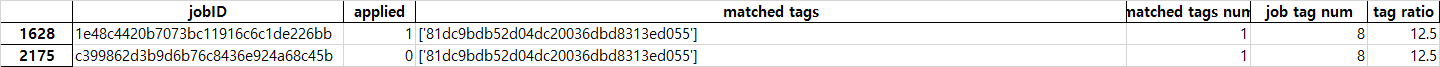

jobID:1e48c4420b7073bc11916c6c1de226bb, c399862d3b9d6b76c8436e924a68c45b의 회사정보를 살펴본다.

In [ ]:
print(job_companies[job_companies['jobID'] == '1e48c4420b7073bc11916c6c1de226bb'])
print(job_companies[job_companies['jobID'] == 'c399862d3b9d6b76c8436e924a68c45b'])

                           companyID                             jobID  \
29  eddea82ad2755b24c4e168c5fc2ebd40  1e48c4420b7073bc11916c6c1de226bb   

   companySize  
29       11-50  
                            companyID                             jobID  \
383  eddea82ad2755b24c4e168c5fc2ebd40  c399862d3b9d6b76c8436e924a68c45b   

    companySize  
383       11-50  


- 두 개의 job모두 같은 회사이며 회사의 크기 또한 동일하다.
- 순서상 1628번에서 해당 회사에 이미 지원했으므로 2175에 지원하지 않았을 가능성을 확인해야 한다.
- 특정 user가 지원 또는 지원하지 않을 jobID에 따른 companyID를 살펴보아야 한다.

In [ ]:
jc = job_companies.set_index('jobID')

sample_jobs['companyID'] = sample_jobs['jobID'].apply(lambda x: jc.at[x, 'companyID'])
print(sample_jobs)
sample_jobs.to_excel('sample_jobs.xlsx')

                                 jobID  applied  \
0     15de21c670ae7c3f6f3f1f37029303c9        0   
21    26337353b7962f533d78c762373b3318        0   
378   ae5e3ce40e0404a45ecacaaf05e5f735        0   
882   eddea82ad2755b24c4e168c5fc2ebd40        0   
910   2b8a61594b1f4c4db0902a8a395ced93        0   
989   5ea1649a31336092c05438df996a3e59        0   
1025  298f95e1bf9136124592c8d4825a06fc        0   
1628  1e48c4420b7073bc11916c6c1de226bb        1   
1688  6e2713a6efee97bacb63e52c54f0ada0        0   
1725  f73b76ce8949fe29bf2a537cfa420e8f        1   
1858  d64a340bcb633f536d56e51874281454        0   
2175  c399862d3b9d6b76c8436e924a68c45b        0   
2244  c8ba76c279269b1c6bc8a07e38e78fa4        0   
2728  5e388103a391daabe3de1d76a6739ccd        0   
2873  1068c6e4c8051cfd4e9ea8072e3189e2        1   
2899  0c74b7f78409a4022a2c4c5a5ca3ee19        1   
2953  062ddb6c727310e76b6200b7c71f63b5        1   
3088  7bcdf75ad237b8e02e301f4091fb6bc8        0   
3168  b495ce63ede0f4efc9eec62cb

- 아래의 두 예시처럼 일치하는 tag 및 회사정보에도 불구하고 3168번일때에는 지원하지 않았으나, 5667번에서는 지원하였다.
- 따라서, 순서가 지원 여부 결정에 영향을 미치진 않은 것으로 판단된다.

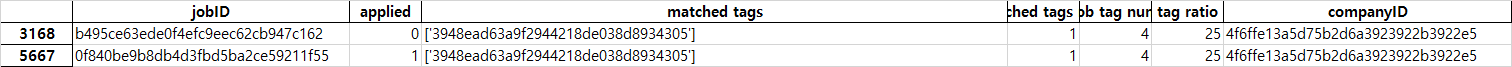

이전 모델은 user의 선호하는 tag를 fit으로 사용하고 job의 tag와 일치하는 tag를 transform으로 feature extraction을 하였으나,  
 이번에는 user가 선호하는 tag가 아닌 전체 tag를 fit으로 사용하고 jobID에 해당하는 모든 tags를 transform으로 사용하고자 한다.

# Sample Model
- All tags를 기반으로 한 feature extraction으로 진행
- CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score

vec_j = CountVectorizer()
vec_m = CountVectorizer()
vec_j.fit(tags['tagID'])
vec_m.fit(sample_tags)

X_j = []
X_m = []

for i in sample_jobs.index:
  X_j.append(vec_j.transform(sample_jobs.at[i, 'job tags']).toarray().sum(axis = 0))
  X_m.append(vec_m.transform(sample_jobs.at[i, 'matched tags']).toarray().sum(axis = 0))

X_j = pd.DataFrame(X_j, columns = vec_j.get_feature_names_out())
X_m = pd.DataFrame(X_m, columns = vec_m.get_feature_names_out())
y = sample_jobs['applied']



In [ ]:
from sklearn.linear_model import LogisticRegression

Xj_train, Xj_test, yj_train, yj_test = train_test_split(X_j, y, stratify = y)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(X_m, y, stratify = y)

lr_j = LogisticRegression().fit(Xj_train, yj_train)
lr_m = LogisticRegression().fit(Xm_train, ym_train)
print(lr_j.score(Xj_test, yj_test), lr_m.score(Xm_test, ym_test))

0.7142857142857143 0.8571428571428571


In [ ]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(lr_j, X_j, y).mean())
print(cross_val_score(lr_m, X_m, y).mean())

0.66
0.78


# 기존의 방식보다 정확도가 낮음

In [ ]:
def match_tag(user_id, job_id):

  # Sample user가 원하는 tag의 IDs
  sample_tags = set(user_tags[user_tags['userID'] == user_id]['tagID'])
  job_tags = set(jt.at[job_id, 'tagID'])
  job_tag_num = jt.at[job_id, 'tag num']
  matched_tags = list(sample_tags.intersection(job_tags))
  return len(matched_tags) / job_tag_num

train_data['tag ratio'] = train_data.apply(lambda x: match_tag(x['userID'], x['jobID']))
print(train_data)